## Libraries

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2


from PIL import Image
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

## Dataset

In [5]:
train_directory = 'data/train'
val_directory   = 'data/val'
test_directory  = 'data/test'

BATCH_SIZE=128
INPUT_SIZE=64

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_directory,
  seed=123,
  image_size=(INPUT_SIZE, INPUT_SIZE),
  batch_size=BATCH_SIZE)


val_ds = tf.keras.utils.image_dataset_from_directory(
  val_directory,
  seed=123,
  image_size=(INPUT_SIZE, INPUT_SIZE),
  batch_size=BATCH_SIZE)
        

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_directory,
  seed=123,
  image_size=(INPUT_SIZE, INPUT_SIZE),
  batch_size=BATCH_SIZE)

Found 83484 files belonging to 4 classes.
Found 32 files belonging to 4 classes.
Found 968 files belonging to 4 classes.


In [7]:
number_of_images_train={}

for dir in os.listdir(test_directory):
    number_of_images_train[dir]=len(os.listdir(os.path.join(train_directory,dir)))
    
    
print(number_of_images_train)

{'NORMAL': 26315, 'CNV': 37205, 'DME': 11348, 'DRUSEN': 8616}


['CNV', 'DME', 'DRUSEN', 'NORMAL']


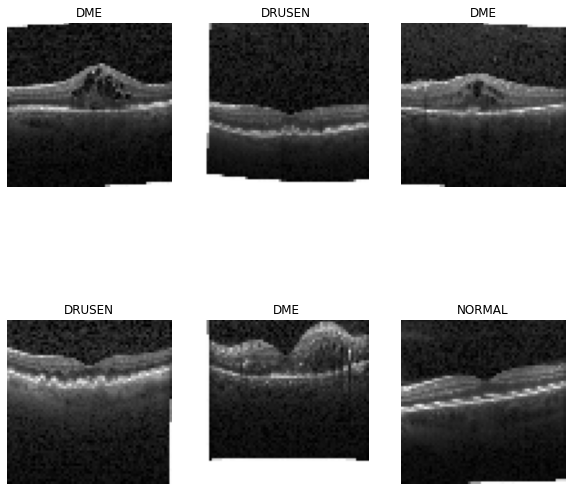

In [8]:
class_names=test_ds.class_names
print(class_names)

fig = plt.figure(figsize=(10, 10)) 
columns = 3
rows = 2
for images, labels in test_ds.take(1):
    for i in range(columns*rows):
        fig.add_subplot(rows, columns, i+1) 
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
image_path_test = 'data/test/CNV/CNV-1016042-1.jpeg'

image=cv2.imread(image_path_test)
image=Image.fromarray(image, 'RGB')
image=image.resize((INPUT_SIZE,INPUT_SIZE))
image=np.array(image)

max=image.max()
min=image.min()

print(f'Image noir et blanc [{min}, {max}]')


Image noir et blanc [0, 255]


In [10]:
# methods to load data (better performance)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Model

In [11]:
num_classes = len(class_names)

model=Sequential()

model.add(Rescaling(1./255, input_shape=(INPUT_SIZE, INPUT_SIZE, 3))),

model.add(Conv2D(filters=16 , kernel_size=(3,3), activation='relu'))

model.add(Conv2D(filters=32 , kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64 , kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128 , kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=num_classes, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                    

In [12]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
epochs=20

history=model.fit(train_ds, 
          verbose=1, 
          epochs=epochs, 
          validation_data=test_ds)

Epoch 1/20


2022-08-19 10:25:08.286729: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 196 of 1000
2022-08-19 10:25:18.256771: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 405 of 1000
2022-08-19 10:25:28.255144: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 610 of 1000
2022-08-19 10:25:29.908304: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.
2022-08-19 10:25:30.520707: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-08-19 10:25:31.001392: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


653/653 [==============================] - 43s 14ms/step - loss: 0.6744 - accuracy: 0.7489 - val_loss: 0.4183 - val_accuracy: 0.8378
Epoch 2/20
653/653 [==============================] - 9s 13ms/step - loss: 0.4129 - accuracy: 0.8544 - val_loss: 0.2320 - val_accuracy: 0.9091
Epoch 3/20
653/653 [==============================] - 9s 13ms/step - loss: 0.3218 - accuracy: 0.8904 - val_loss: 0.1146 - val_accuracy: 0.9628
Epoch 4/20
653/653 [==============================] - 9s 14ms/step - loss: 0.2833 - accuracy: 0.9019 - val_loss: 0.1001 - val_accuracy: 0.9752
Epoch 5/20
653/653 [==============================] - 9s 14ms/step - loss: 0.2461 - accuracy: 0.9141 - val_loss: 0.1349 - val_accuracy: 0.9504
Epoch 6/20
653/653 [==============================] - 9s 13ms/step - loss: 0.2245 - accuracy: 0.9227 - val_loss: 0.0959 - val_accuracy: 0.9638
Epoch 7/20
653/653 [==============================] - 9s 13ms/step - loss: 0.2038 - accuracy: 0.9287 - val_loss: 0.0500 - val_accuracy: 0.9876
Epoch 8/2

## Result

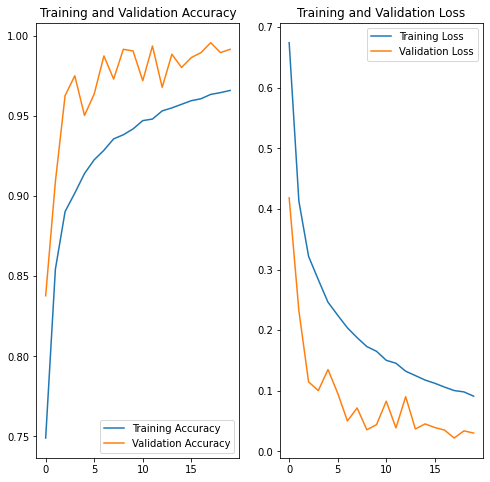

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 13ms/step


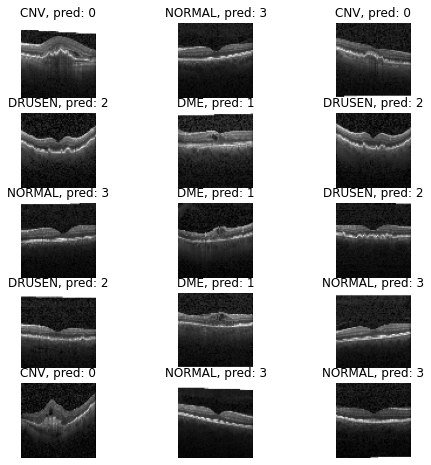

In [15]:
NUMBER_IMAGE=15

plt.figure(figsize=(8, 8))
for images, labels in val_ds.take(1):
    for i in range(NUMBER_IMAGE):
        ax = plt.subplot(5, 3, i + 1 )
        plt.imshow(images[i].numpy().astype("uint8"))
        pred=np.argmax(model.predict(np.expand_dims(images[i], axis=0)))
        plt.title(f'{class_names[labels[i]]}, pred: {pred}')
        plt.axis("off")

In [16]:
model.evaluate(val_ds)

1/1 [==============================] - 0s 64ms/step - loss: 0.0196 - accuracy: 1.0000


[0.019567037001252174, 1.0]